In [ ]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<font size="5" color="red" >딥러닝</font>

# 1. 기존의 프로그램 방식
-회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html
-오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erroerror ; 절대값평균)
-
https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
-경사하강법 설명
-https://www.mql5.com/ko/articles/11200

In [1]:
# 섭씨온도를 입력받아 화씨온도를 출력
def celsius_to_faherenheit(c):
    return c * 1.8 + 32

In [2]:
input_c = int(input('섭씨온도 ?'))
print('화씨온도는', celsius_to_faherenheit(input_c))

화씨온도는 253.4


# 2. 머신러닝 프로그램 방식
```
1. 데이터 확보 및 생성
2. 데이터 전처리 :
    스케일 조정
    훈련데이터(학습데이터 셋), 검증데이터셋, 시험데이터셋 으로 분할
3. 모델구성
4. 모델 학습과정 설정
5. 모델 학습시키기
6. 모델 평가(시험데이터셋으로)
7. 모델 저장 및 사용(입력값이 주어지면 예측값 받기)
```
## 2.1 노이즈가 없는 데이터로 실습

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 1. 데이터 생성1
data_C = np.arange(100) # 0부터 99
data_C # 독립변수 (입력변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
data_F = celsius_to_faherenheit(data_C)
data_F # 종속변수(타겟변수, 출력변수)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [6]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해 스케일 조정
scaled_data_C = data_C / 100.0
scaled_data_F = data_F / 100.0
print('학습시 독립변수 : ', scaled_data_C)
print('학습시 타겟변수 : ', scaled_data_F)

학습시 독립변수 :  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
학습시 타겟변수 :  [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688

In [7]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[]

In [8]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input # 입력값과 출력값으로 layer 층 지정

model = Sequential()
# model.add(Input(shape=(1,) ))
# model.add(Dense(1))
model.add(Dense(units=1, # 타겟(종속) 변수의 갯수
                input_shape=(1,))) # 입력(독립) 변수의 shape                         

In [9]:
# 4. 모델 학습과정 설정
model.compile(optimizer='rmsprop', # 옵티마이저
              loss='mse', # 손실함수
              metrics=['mae']) # 평가지표 
# mse : 오차 제곱의 평균( 이상치 반영)
# mae : 오차 절대값의 평균(이상치 영향이 감소)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 학습전 예측
model.predict(np.array([[0],
                        [0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 98ms/step


array([[0.        ],
       [0.00771832]], dtype=float32)

In [11]:
model.save('model/before_learning.h5')

In [12]:
# 5. 모델 학습시키기 - 1번만 실행
hist = model.fit(scaled_data_C, # 입력변수(훈련데이터)
                 scaled_data_F, # 타겟변수(훈련데이터)
                 epochs=1000, # 학습횟수
                 verbose=2) # 학습시 출력여부(0:학습내용출력)

Epoch 1/1000
4/4 - 0s - loss: 0.7670 - mae: 0.8243 - 485ms/epoch - 121ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.7474 - mae: 0.8131 - 7ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.7326 - mae: 0.8046 - 10ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.7209 - mae: 0.7977 - 7ms/epoch - 2ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.7101 - mae: 0.7913 - 11ms/epoch - 3ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.7000 - mae: 0.7853 - 12ms/epoch - 3ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.6899 - mae: 0.7793 - 13ms/epoch - 3ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.6802 - mae: 0.7735 - 8ms/epoch - 2ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.6700 - mae: 0.7673 - 9ms/epoch - 2ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.6601 - mae: 0.7612 - 8ms/epoch - 2ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.6511 - mae: 0.7557 - 10ms/epoch - 3ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.6419 - mae: 0.7500 - 8ms/epoch - 2ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.6319 - mae: 0.7438 - 13ms/epoch - 3ms/step
Epoch 14/1000
4/4 - 0s -

In [16]:
# 6. 모델 평가 (그래프를 통해 loss와 metrics값의 추이, 평가함수)
print(hist.history.keys())
print(hist.history['loss'][:5])
print(hist.history['mae'][:5])


dict_keys(['loss', 'mae'])
[0.766977846622467, 0.7474062442779541, 0.7326368689537048, 0.7209333181381226, 0.710111141204834]
[0.8243265748023987, 0.8130905628204346, 0.8045710921287537, 0.7976937294006348, 0.7913209795951843]


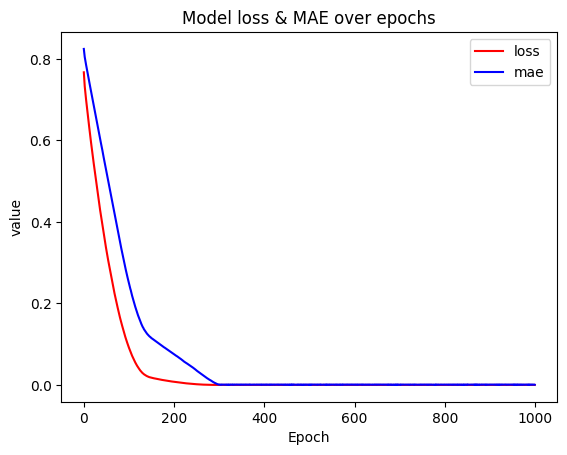

In [18]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend() # 범례 label 추가
plt.xlabel('Epoch')
plt.ylabel('value')
plt.title('Model loss & MAE over epochs')
plt.show()

In [19]:
# 7. 모델 저장 및 사용
# 학습 후 예측
model.predict(np.array([[0],
                        [0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 25ms/step


array([[0.32035187],
       [0.33834907]], dtype=float32)

In [20]:
model.save('model/after_learning.h5')

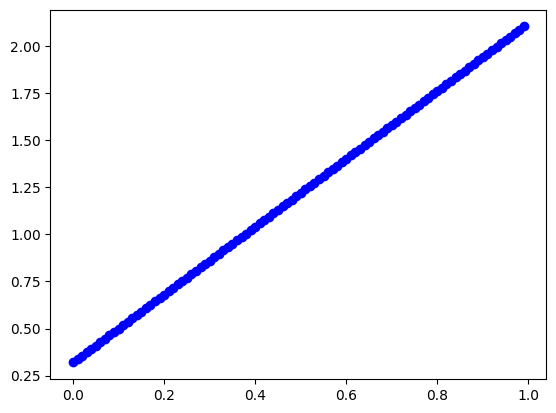

In [21]:
# 실제값
plt.scatter(x=scaled_data_C,
            y=scaled_data_F,
            c='b')

In [23]:
# 예측값
y_hat = model.predict([scaled_data_C])
for h, y in zip(y_hat, scaled_data_F):
    print('예측값:{}, 실제값:{}, 오차:{}'.format(h,
                                       y,
                                       h[0]-y))

4/4 [==============================] - 0s 2ms/step
예측값:[0.32035187], 실제값:0.32, 오차:0.00035186886787413885
예측값:[0.33834907], 실제값:0.33799999999999997, 오차:0.00034907412528994985
예측값:[0.3563463], 실제값:0.35600000000000004, 오차:0.00034630918502803754
예측값:[0.3743435], 실제값:0.374, 오차:0.00034351444244384854
예측값:[0.39234072], 실제값:0.392, 오차:0.00034071969985960404
예측값:[0.41033795], 실제값:0.41, 오차:0.00033795475959780275
예측값:[0.42833516], 실제값:0.428, 오차:0.00033516001701355824
예측값:[0.4463324], 실제값:0.446, 오차:0.00033239507675170143
예측값:[0.4643296], 실제값:0.46399999999999997, 오차:0.00032960033416751244
예측값:[0.4823268], 실제값:0.48200000000000004, 오차:0.00032680559158321243
예측값:[0.500324], 실제값:0.5, 오차:0.00032401084899902344
예측값:[0.5183212], 실제값:0.518, 오차:0.00032121610641477893
예측값:[0.5363184], 실제값:0.536, 오차:0.00031842136383053443
예측값:[0.5543157], 실제값:0.554, 오차:0.0003156862258910653
예측값:[0.5723129], 실제값:0.5720000000000001, 오차:0.0003128914833068208
예측값:[0.5903101], 실제값:0.59, 오차:0.00031009674072268734
예측값:[0.6083073], 실제

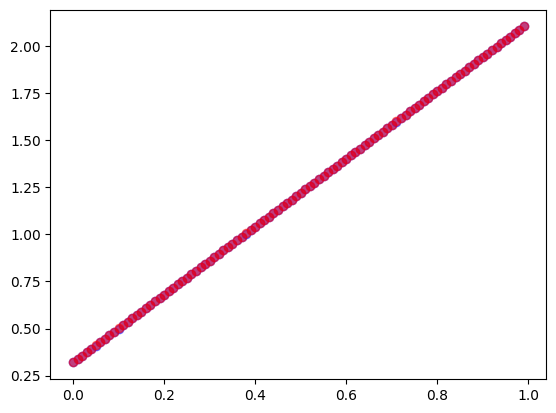

In [26]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=0.5) # 투명한 점그래프
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=0.5)

## 2.2 노이즈가 있는 데이터로 실습

In [29]:
np.random.seed(7)
noise = np.random.normal(0, scale=0.1, size=100) # 평균0, 표준편차 0.1개 100개 데이터
noised_scaled_data_F = scaled_data_F + noise

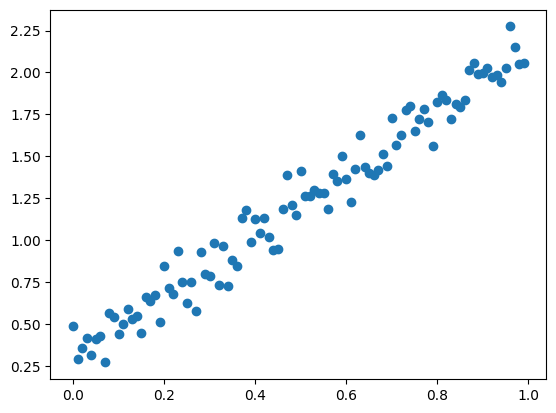

In [30]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F)
plt.show()

In [31]:
# 3. 모델구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 5. 모델 학습
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.8284 - mae: 1.5188
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.8007 - mae: 1.5102
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.7783 - mae: 1.5035
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.7565 - mae: 1.4968
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.7364 - mae: 1.4906
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.7174 - mae: 1.4847
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.6980 - mae: 1.4788
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.6792 - mae: 1.4729
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.6607 - mae: 1.4671
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.6394 - mae: 1.4604
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - lo

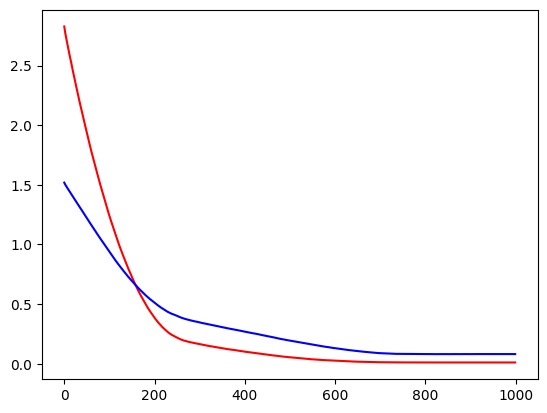

In [35]:
# 6. 학습된 모델 과정 살펴보기
plt.plot(hist2.history['loss'], c='r')
plt.plot(hist2.history['mae'], c='b')

In [42]:
model2.save('model/noise_after_learning.h5')

In [37]:
# 예측값
y_hat = model2.predict([scaled_data_C])

4/4 [==============================] - 0s 2ms/step


In [38]:
for h, y in zip(y_hat, noised_scaled_data_F):
    print("실제값:{}, 예측값:{}, 오차:{}".format(y,
                                         h,
                                         h[0]-y))

실제값:0.48905257038003563, 예측값:[0.30231377], 오차:-0.18673879555589318
실제값:0.2914062629459167, 예측값:[0.32068515], 오차:0.029278885293219037
실제값:0.3592820163678585, 예측값:[0.33905655], 오차:-0.020225464911407087
실제값:0.4147516282996508, 예측값:[0.35742792], 오차:-0.057323703428206085
실제값:0.31310769713742614, 예측값:[0.3757993], 오차:0.06269160114901184
실제값:0.4102065572905948, 예측값:[0.39417067], 오차:-0.016035885589163523
실제값:0.42791096141420687, 예측값:[0.41254205], 오차:-0.015368916297782309
실제값:0.2705275693654579, 예측값:[0.43091345], 오차:0.16038587896828232
실제값:0.5657658005663493, 예측값:[0.44928482], 오차:-0.11648097881761577
실제값:0.542049851591955, 예측값:[0.4676562], 오차:-0.07439365642822815
실제값:0.43745710260332404, 예측값:[0.4860276], 오차:0.048570495777718437
실제값:0.5008451738804279, 예측값:[0.50439894], 오차:0.0035537681132854493
실제값:0.5865299374196752, 예측값:[0.52277035], 오차:-0.06375959220864613
실제값:0.5278643584808353, 예측값:[0.54114175], 오차:0.013277389947509377
실제값:0.5477250921327455, 예측값:[0.5595131], 오차:0.011787999908270175
실제값:0.44

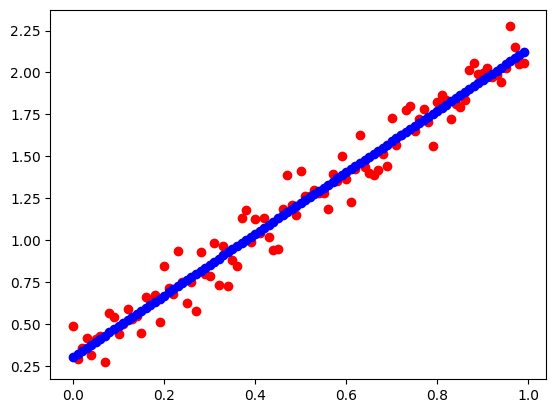

In [40]:
plt.scatter(x=scaled_data_C,
            y=noised_scaled_data_F,
            c='r')
plt.scatter(x=scaled_data_C,
            y=y_hat,
            c='b')


In [44]:
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
import numpy as np